In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [15]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [16]:
mnist.data.to_numpy()[0][150:200]

array([  0.,   0.,   3.,  18.,  18.,  18., 126., 136., 175.,  26., 166.,
       255., 247., 127.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  30.,  36.,  94., 154., 170., 253., 253.,
       253., 253., 253., 225., 172., 253., 242., 195.,  64.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.])

mnist.data[0]

In [17]:
mnist.data.to_numpy()[0] # mnist.data[0]  이렇게 하면 오류 발생 ==> to_numpy()[0] 해야함

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [18]:
mnist.target[0]

'5'

In [19]:
mnist.target = mnist.target.astype(np.int8)

In [20]:
X = mnist.data.to_numpy() / 255 # 0-255값을 [0,1] 구간으로 정규화
y = mnist.target

In [21]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

이 이미지 데이터의 레이블은 5이다.


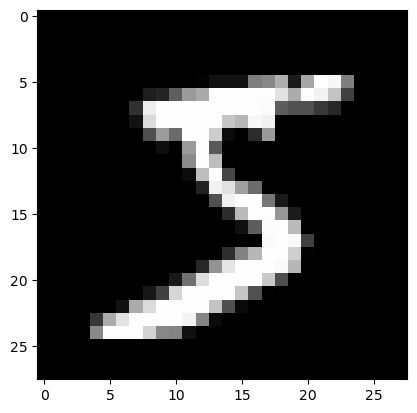

In [22]:
plt.imshow(X[0].reshape(28,28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다.".format(y[0]))

In [23]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test.to_numpy())  # y_test = torch.LongTensor(y_test) 이렇게 하면 오류발생

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

3.다층 퍼셉트론

In [26]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [28]:
from torch import optim

# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [33]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0222, -0.0164, -0.0193,  ..., -0.0238,  0.0214,  0.0122],
        [-0.0204,  0.0248, -0.0178,  ..., -0.0110, -0.0053,  0.0105],
        [-0.0185, -0.0024, -0.0084,  ..., -0.0292, -0.0198, -0.0189],
        ...,
        [-0.0086, -0.0189, -0.0046,  ...,  0.0131, -0.0353, -0.0342],
        [ 0.0343,  0.0221, -0.0064,  ..., -0.0052, -0.0236, -0.0309],
        [ 0.0068,  0.0271,  0.0277,  ...,  0.0084,  0.0234,  0.0284]],
       requires_grad=True), Parameter containing:
tensor([ 0.0314,  0.0292,  0.0299,  0.0271,  0.0182,  0.0314,  0.0253, -0.0330,
        -0.0130, -0.0314,  0.0185, -0.0224, -0.0120, -0.0212, -0.0130, -0.0076,
        -0.0100, -0.0037,  0.0077, -0.0282,  0.0024, -0.0129,  0.0100,  0.0256,
        -0.0099,  0.0066, -0.0311,  0.0124, -0.0156, -0.0290,  0.0124, -0.0099,
        -0.0001,  0.0141,  0.0200, -0.0116, -0.0044,  0.0141, -0.0067, -0.0350,
         0.0122, -0.0054,  0.0052, -0.0309, -0.0002, -0.0233,  0.0291,  0.0247,
        -0.00

In [32]:
def train(epoch):
    model.train()  # 신경망을 학습 모드로 전환
    
		# 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:
        
        optimizer.zero_grad()  # 경사를 0으로 초기화
        outputs = model(data)  # 데이터를 입력하고 출력을 계산
        loss = loss_fn(outputs, targets)  # 출력과 훈련데이터 정답간의 오차를 계산
        loss.backward()  # 오차를 역전파 계산
        optimizer.step()  # 역전파 계산한 값으로 가중치를 수정
        
    print("epoch{} : 완료\n".format(epoch))

In [34]:
def test():
    model.eval()
    correct = 0
    
		#데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad(): # 추론 과정에는 미분이 필요 없음
        for data, targets in loader_test:
            
            outputs = model(data) #...
            
						# 추론계tks
            _, predicted = torch.max(outputs.data, 1) # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum() # 정답과 일치한 경우...

		#정확도 출력        
    data_num = len(loader_test.dataset) # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct, data_num, 100. * correct / data_num))
            

In [35]:
test()


테스트 데이터에서 예측 정확도: 1051/10000 (11%)



In [37]:
for epoch in range(3):
    train(epoch)
    
test()

epoch0 : 완료

epoch1 : 완료

epoch2 : 완료


테스트 데이터에서 예측 정확도: 9628/10000 (96%)



tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

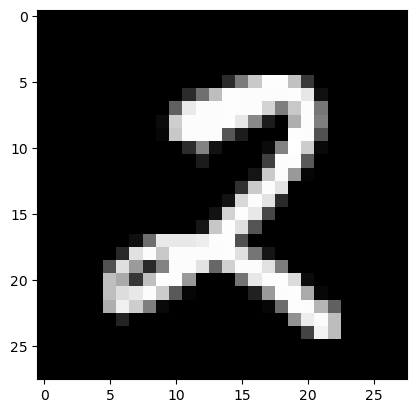

In [46]:
index = 2018
model.eval()
data = X_test[index]
print(data)
output = model(data)
print(output.data)
_, predicted = torch.max(output.data, 0)
print(_)
print(predicted)

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다.".format(y_test[index]))